In [2]:
#pip install hdbscan
#!pip install scikit-learn-extra

# Librerias

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

c:\Users\tomys\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\tomys\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# Guardar datos

In [2]:
d_g=pd.read_csv('datos/distancia_gaussians.csv')
d_g_bray=pd.read_csv('datos/gaussian-braycurtis.csv')
d_g_can=pd.read_csv('datos/gaussian-canberra.csv')
d_g_che=pd.read_csv('datos/gaussian-chebyshev.csv')
d_g_city=pd.read_csv('datos/gaussian-cityblock.csv')
d_g_cor=pd.read_csv('datos/gaussian-correlation.csv')
d_g_cos=pd.read_csv('datos/gaussian-cosine.csv')
d_g_mah=pd.read_csv('datos/gaussian-mahalanobis.csv')
d_g_se=pd.read_csv('datos/gaussian-seuclidean.csv')
d_z=pd.read_csv('datos/non_zero_covariance.csv')
d_z_bray=pd.read_csv('datos/zero-braycurtis.csv')
d_z_can=pd.read_csv('datos/zero-canberra.csv')
d_z_che=pd.read_csv('datos/zero-chebyshev.csv')
d_z_city=pd.read_csv('datos/zero-cityblock.csv')
d_z_cor=pd.read_csv('datos/zero-correlation.csv')
d_z_cos=pd.read_csv('datos/zero-mahalanobis.csv')
d_z_mah=pd.read_csv('datos/zero-cosine.csv')
d_z_se=pd.read_csv('datos/zero-seuclidean.csv')
d_si=pd.read_csv('datos/sizes.csv')
d_si_bray=pd.read_csv('datos/sizes-braycurtis.csv')
d_si_can=pd.read_csv('datos/sizes-canberra.csv')
d_si_che=pd.read_csv('datos/sizes-chebyshev.csv')
d_si_city=pd.read_csv('datos/sizes-cityblock.csv')
d_si_cor=pd.read_csv('datos/sizes-correlation.csv')
d_si_cos=pd.read_csv('datos/sizes-mahalanobis.csv')
d_si_mah=pd.read_csv('datos/sizes-cosine.csv')
d_si_se=pd.read_csv('datos/sizes-seuclidean.csv')
d_sp=pd.read_csv('datos/spiral.csv')
d_sp_bray=pd.read_csv('datos/spiral-braycurtis.csv')
d_sp_can=pd.read_csv('datos/spiral-canberra.csv')
d_sp_che=pd.read_csv('datos/spiral-chebyshev.csv')
d_sp_city=pd.read_csv('datos/spiral-cityblock.csv')
d_sp_cor=pd.read_csv('datos/spiral-correlation.csv')
d_sp_cos=pd.read_csv('datos/spiral-mahalanobis.csv')
d_sp_mah=pd.read_csv('datos/spiral-cosine.csv')
d_sp_se=pd.read_csv('datos/spiral-seuclidean.csv')
d_va=pd.read_csv('datos/variances.csv')
d_va_bray=pd.read_csv('datos/variances-braycurtis.csv')
d_va_can=pd.read_csv('datos/variances-canberra.csv')
d_va_che=pd.read_csv('datos/variances-chebyshev.csv')
d_va_city=pd.read_csv('datos/variances-cityblock.csv')
d_va_cor=pd.read_csv('datos/variances-correlation.csv')
d_va_cos=pd.read_csv('datos/variances-mahalanobis.csv')
d_va_mah=pd.read_csv('datos/variances-cosine.csv')
d_va_se=pd.read_csv('datos/variances-seuclidean.csv')


# Funciones

In [3]:
# Función para generar una tabla con la cantidad de puntos en cada clúster
def generate_cluster_summary(labels):
    cluster_counts = pd.Series(labels).value_counts().sort_index()
    summary_df = pd.DataFrame({"Cluster": cluster_counts.index, "Number of Points": cluster_counts.values})
    return summary_df
def elbow_method_with_distances(distance_matrix, k_range):
    """
    Aplica el método del codo para encontrar el número óptimo de clusters utilizando una matriz de distancias.

    Parámetros:
    distance_matrix: ndarray de forma (n_samples, n_samples)
        La matriz de distancias entre los puntos.
    k_range: range
        Rango de valores de k para probar en el método del codo.

    Devuelve:
    None (traza una gráfica del método del codo)
    """
    inertia = []

    for k in k_range:
        kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=0)
        kmedoids.fit(distance_matrix)
        inertia.append(kmedoids.inertia_)

    # Graficar el método del codo
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia, 'bo-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del codo')
    plt.show()
def apply_hierarchical_clustering(dist_matrix, n_clusters,criterion='inconsistent',method='single'):
    # linkage function requires a condensed distance matrix, so we need to convert it
    condensed_dist_matrix = distance.squareform(dist_matrix)
    Z = linkage(condensed_dist_matrix, method)
    labels = fcluster(Z, n_clusters, criterion)
    return Z, labels
def apply_kmedoids(dist_matrix, n_clusters):
    kmedoids = KMedoids(n_clusters=n_clusters, metric='precomputed', random_state=42)
    kmedoids.fit(dist_matrix)
    labels = kmedoids.labels_
    return labels
def evaluate_clustering(dist_matrix, predicted_labels):
    """
    Evalúa la calidad del clustering calculando las distancias intra e inter-clúster.

    Parámetros:
    - dist_matrix: ndarray o DataFrame de pandas de forma (n_samples, n_samples)
        Matriz de distancias entre los puntos.
    - predicted_labels: array de forma (n_samples,)
        Etiquetas de los clústeres asignados.

    Devuelve:
    - metrics: dict
        Diccionario con las distancias intra e inter-clúster.
    """
    if isinstance(dist_matrix, pd.DataFrame):
        dist_matrix = dist_matrix.values  # Convertir DataFrame a ndarray

    unique_labels = np.unique(predicted_labels)
    n_clusters = len(unique_labels)
    
    # Cálculo de la distancia intra-clúster
    intra_cluster_distances = []
    for label in unique_labels:
        cluster_indices = np.where(predicted_labels == label)[0]
        cluster_distances = dist_matrix[cluster_indices][:, cluster_indices]
        intra_cluster_distance = np.mean(cluster_distances[np.triu_indices_from(cluster_distances, k=1)])
        intra_cluster_distances.append(intra_cluster_distance)
    avg_intra_cluster_distance = np.mean(intra_cluster_distances)
    
    # Cálculo de la distancia inter-clúster
    inter_cluster_distances = []
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i_indices = np.where(predicted_labels == unique_labels[i])[0]
            cluster_j_indices = np.where(predicted_labels == unique_labels[j])[0]
            pairwise_distances = dist_matrix[np.ix_(cluster_i_indices, cluster_j_indices)]
            inter_cluster_distances.append(np.mean(pairwise_distances))
    min_inter_cluster_distance = np.min(inter_cluster_distances)
    
    return {
        'avg_intra_cluster_distance': avg_intra_cluster_distance,
        'min_inter_cluster_distance': min_inter_cluster_distance
    }

# Gaussian

## Euclidean

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

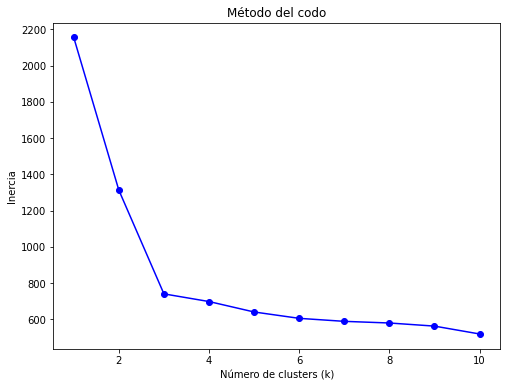

In [6]:
elbow_method_with_distances(d_g, range(1, 11))

In [7]:
n_clusters = 3
labels = apply_kmedoids(d_g, n_clusters)
cluster_summary = generate_cluster_summary(labels)
print("KMedoids - Resumen de Clústeres:")
print(cluster_summary)

   Cluster  Number of Points
0        0               199
1        1               197
2        2               204


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [19]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_g, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.8673734602589296, 'min_inter_cluster_distance': 4.969447800310091}


   Cluster  Number of Points
0        1               195
1        2               178
2        3               227


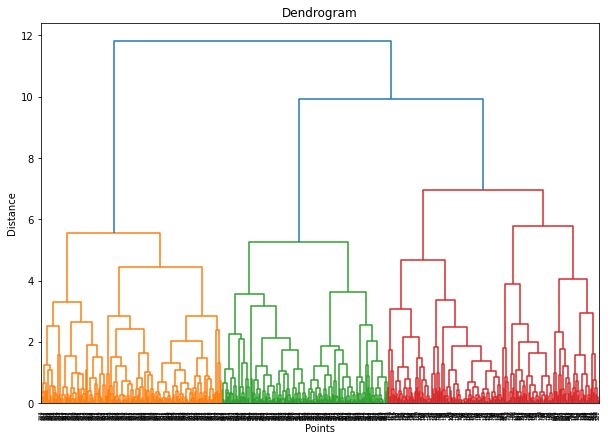

In [4]:
n_clusters = 3
Z, labels = apply_hierarchical_clustering(d_g, n_clusters,'maxclust','complete')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [5]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_g, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.8095541551359264, 'min_inter_cluster_distance': 5.076353512320794}


## Manhatan

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

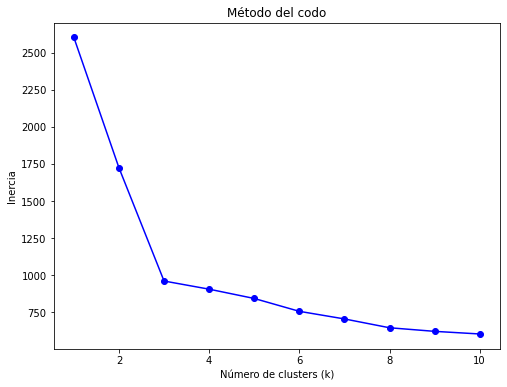

In [6]:
elbow_method_with_distances(d_g_city, range(1, 11))

In [7]:
n_clusters = 3
labels = apply_kmedoids(d_g_city, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0               200
1        1               200
2        2               200


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [8]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_g_city, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 2.2397749502865447, 'min_inter_cluster_distance': 6.90093792680701}


   Cluster  Number of Points
0        1               190
1        2               200
2        3               210


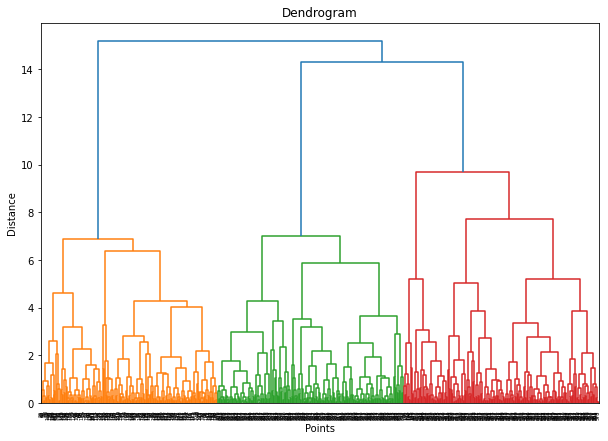

In [9]:
n_clusters = 3
Z, labels = apply_hierarchical_clustering(d_g_city, n_clusters,'maxclust','complete')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [10]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_g_city, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 2.281716304850688, 'min_inter_cluster_distance': 6.827180888770109}


## Seuclidean

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

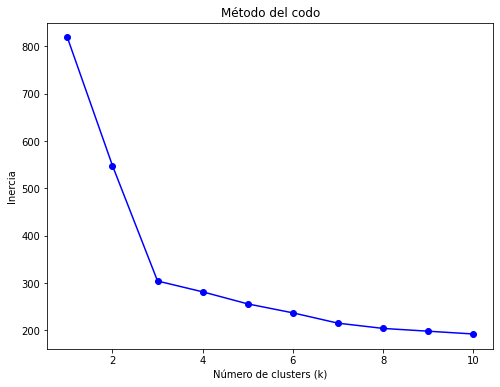

In [11]:
elbow_method_with_distances(d_g_se, range(1, 11))

In [12]:
n_clusters = 3
labels = apply_kmedoids(d_g_se, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0               200
1        1               201
2        2               199


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [13]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_g_se, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 0.7122490284979169, 'min_inter_cluster_distance': 2.1759051195275996}


   Cluster  Number of Points
0        1               180
1        2               198
2        3               222


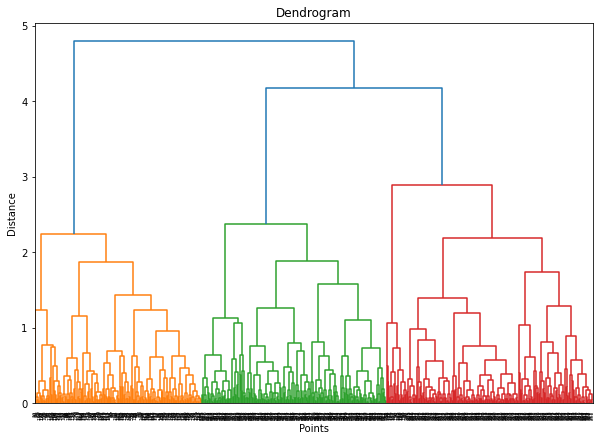

In [14]:
n_clusters = 3
Z, labels = apply_hierarchical_clustering(d_g_se, n_clusters,'maxclust','complete')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [15]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_g_se, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 0.7463258379020926, 'min_inter_cluster_distance': 2.2504947873420043}


## Braycurtis

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

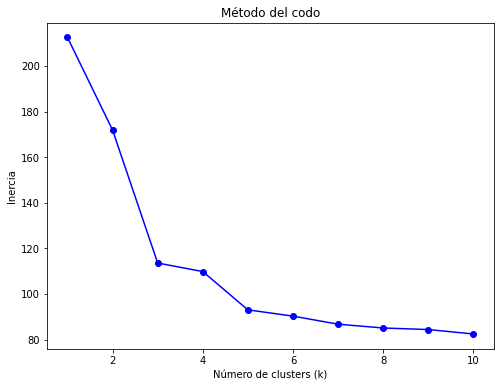

In [16]:
elbow_method_with_distances(d_g_bray, range(1, 11))

In [17]:
n_clusters = 3
labels = apply_kmedoids(d_g_bray, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0               205
1        1               215
2        2               180


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [18]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_g_bray, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 0.2994740970375802, 'min_inter_cluster_distance': 0.4340461082129907}


   Cluster  Number of Points
0        1               299
1        2                10
2        3               272
3        4                 7
4        5                12


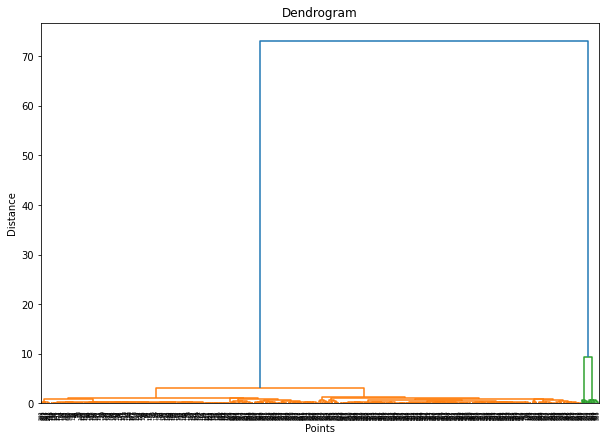

In [21]:
n_clusters = 3
Z, labels = apply_hierarchical_clustering(d_g_bray, n_clusters,'maxclust','complete')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [20]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_g_bray, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 0.39533871140658783, 'min_inter_cluster_distance': 1.1574134652902572}


# Diferent sizes

## Euclidean

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

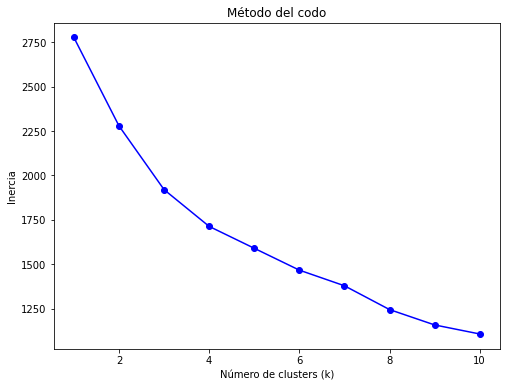

In [23]:
elbow_method_with_distances(d_si, range(1, 11))

In [24]:
n_clusters = 2
labels = apply_kmedoids(d_si, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0               977
1        1              1073


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [25]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_si, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.600236414385701, 'min_inter_cluster_distance': 2.2972192460130185}


   Cluster  Number of Points
0        1                51
1        2              1999


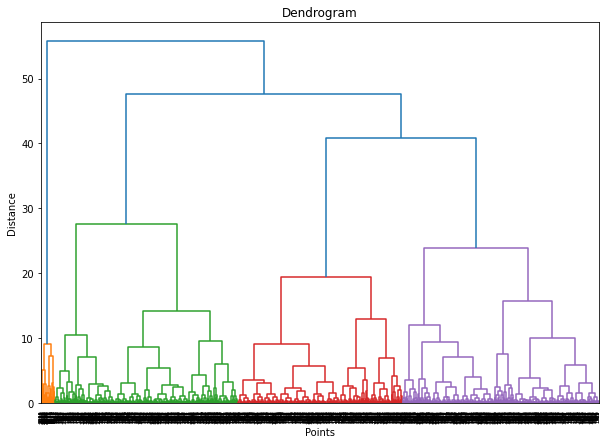

In [26]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_si, n_clusters,'maxclust','ward')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [27]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_si, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.827102745017915, 'min_inter_cluster_distance': 5.778154370102832}


## Manhatan

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

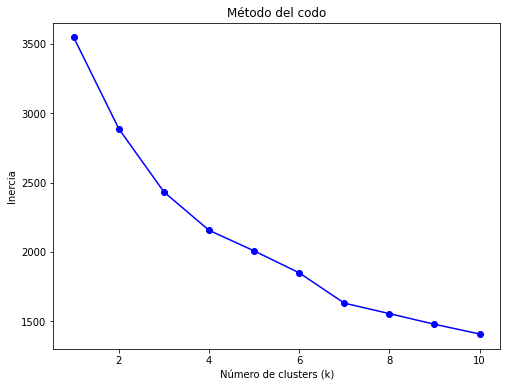

In [28]:
elbow_method_with_distances(d_si_city, range(1, 11))

In [29]:
n_clusters = 2
labels = apply_kmedoids(d_si_city, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0              1059
1        1               991


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [30]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_si_city, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 2.0401824584459334, 'min_inter_cluster_distance': 2.985632899322538}


   Cluster  Number of Points
0        1                54
1        2              1996


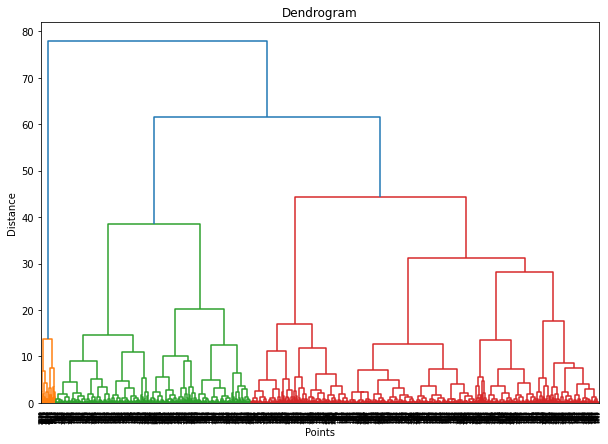

In [31]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_si_city, n_clusters,'maxclust','ward')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [32]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_si_city, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 2.296810015836132, 'min_inter_cluster_distance': 7.753300323340271}


## Seuclidean

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

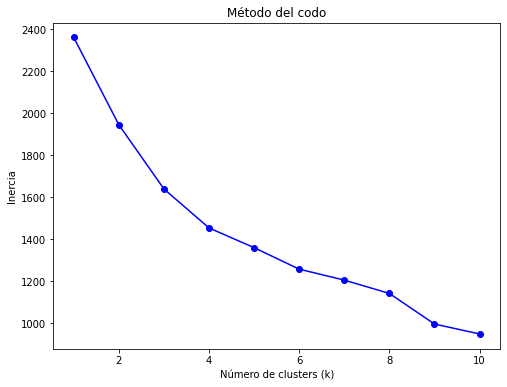

In [33]:
elbow_method_with_distances(d_si_se, range(1, 11))

In [34]:
n_clusters = 2
labels = apply_kmedoids(d_si_se, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0              1025
1        1              1025


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [35]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_si_se, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.3844764489019061, 'min_inter_cluster_distance': 1.9490871696895062}


   Cluster  Number of Points
0        1                50
1        2              2000


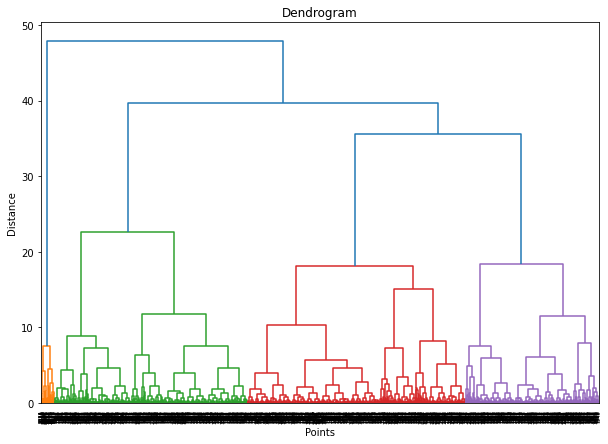

In [36]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_si_se, n_clusters,'maxclust','ward')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [37]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_si_se, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.482839644130036, 'min_inter_cluster_distance': 4.996811330978246}


## Braycurtis

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

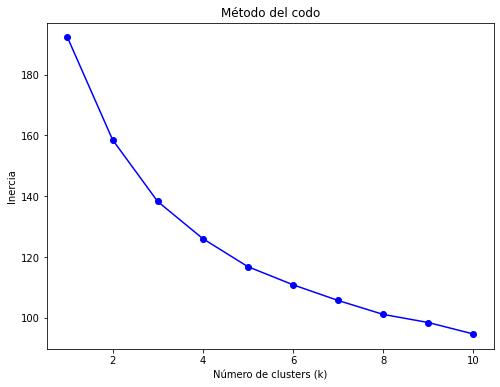

In [38]:
elbow_method_with_distances(d_si_bray, range(1, 11))

In [39]:
n_clusters = 2
labels = apply_kmedoids(d_si_bray, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0              1092
1        1               958


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [40]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_si_bray, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 0.11819491058040056, 'min_inter_cluster_distance': 0.16577753910778192}


   Cluster  Number of Points
0        1                39
1        2              2011


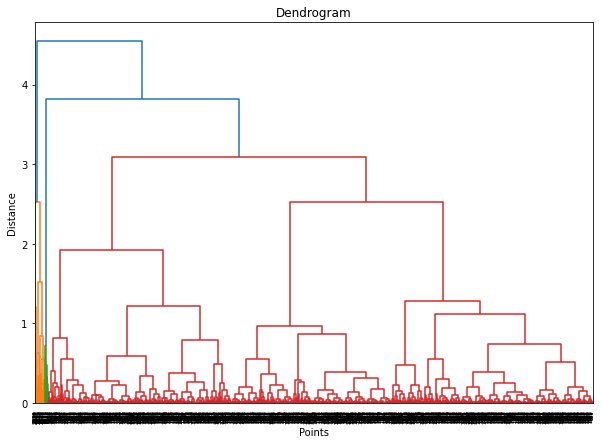

In [41]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_si_bray, n_clusters,'maxclust','ward')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [42]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_si_bray, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 0.3044563280679484, 'min_inter_cluster_distance': 0.6403178399283432}


# Variance

## Euclidean

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

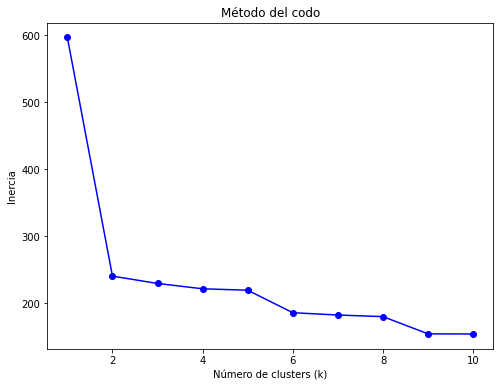

In [43]:
elbow_method_with_distances(d_va, range(1, 11))

In [44]:
n_clusters = 2
labels = apply_kmedoids(d_va, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0                90
1        1               110


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [45]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_va, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.838716623071356, 'min_inter_cluster_distance': 6.051700121065944}


   Cluster  Number of Points
0        1               101
1        2                99


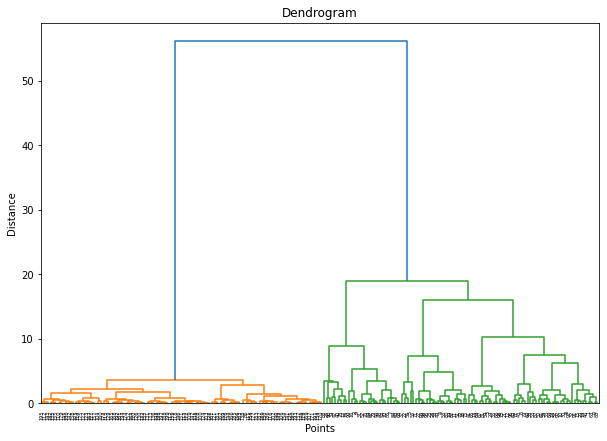

In [46]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_va, n_clusters,'maxclust','ward')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [47]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_va, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.8007400707209644, 'min_inter_cluster_distance': 5.892589627614326}


## Manhatan

In [ ]:
elbow_method_with_distances(d_va_city, range(1, 11))

In [ ]:
n_clusters = 2
labels = apply_kmedoids(d_va_city, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

In [ ]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_va_city, labels)
print("KMedoids - Métricas:")
print(metrics)

In [ ]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_va_city, n_clusters,'maxclust','ward')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_va_city, labels)
print("KMedoids - Métricas:")
print(metrics)

## Seuclidean

In [ ]:
elbow_method_with_distances(d_va_se, range(1, 11))

In [ ]:
n_clusters = 2
labels = apply_kmedoids(d_va_se, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

In [ ]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_va_se, labels)
print("KMedoids - Métricas:")
print(metrics)

In [ ]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_va_se, n_clusters,'maxclust','ward')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_va_se, labels)
print("KMedoids - Métricas:")
print(metrics)

## Braycurtis

In [ ]:
elbow_method_with_distances(d_va_bray, range(1, 11))

In [ ]:
n_clusters = 2
labels = apply_kmedoids(d_va_bray, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

In [ ]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_va_bray, labels)
print("KMedoids - Métricas:")
print(metrics)

In [ ]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_va_bray, n_clusters,'maxclust','ward')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_va_bray, labels)
print("KMedoids - Métricas:")
print(metrics)

# Non zero Covariance

## Euclidean

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

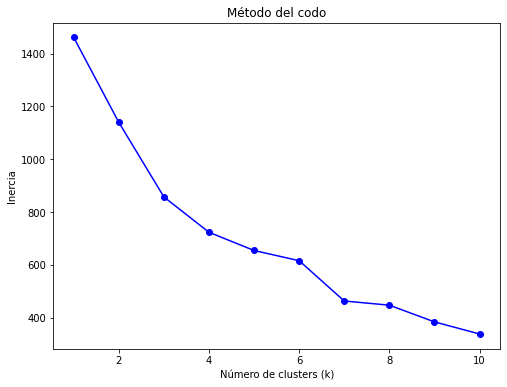

In [48]:
elbow_method_with_distances(d_z, range(1, 11))

In [49]:
n_clusters = 2
labels = apply_kmedoids(d_z, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0               500
1        1               500


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [50]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_z, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.611049476558506, 'min_inter_cluster_distance': 2.277865159916572}


   Cluster  Number of Points
0        1               500
1        2               500


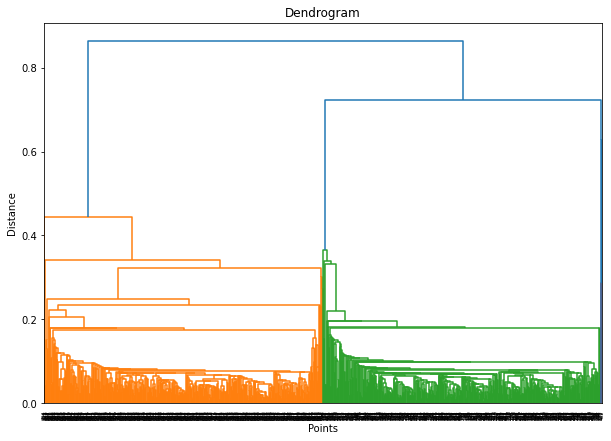

In [51]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_z, n_clusters,'maxclust','single')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [52]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_z, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.611049476558506, 'min_inter_cluster_distance': 2.277865159916572}


## Manhatan

In [ ]:
elbow_method_with_distances(d_z_city, range(1, 11))

In [ ]:
n_clusters = 2
labels = apply_kmedoids(d_z_city, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

In [ ]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_z_city, labels)
print("KMedoids - Métricas:")
print(metrics)

In [ ]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_z_city, n_clusters,'maxclust','single')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_z_city, labels)
print("KMedoids - Métricas:")
print(metrics)

## Seuclidean

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

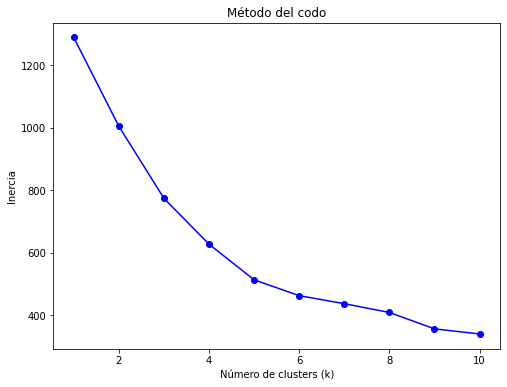

In [58]:
elbow_method_with_distances(d_z_se, range(1, 11))

In [59]:
n_clusters = 2
labels = apply_kmedoids(d_z_se, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0               500
1        1               500


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [60]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_z_se, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.4369357563353038, 'min_inter_cluster_distance': 2.0159039884268104}


   Cluster  Number of Points
0        1               500
1        2               500


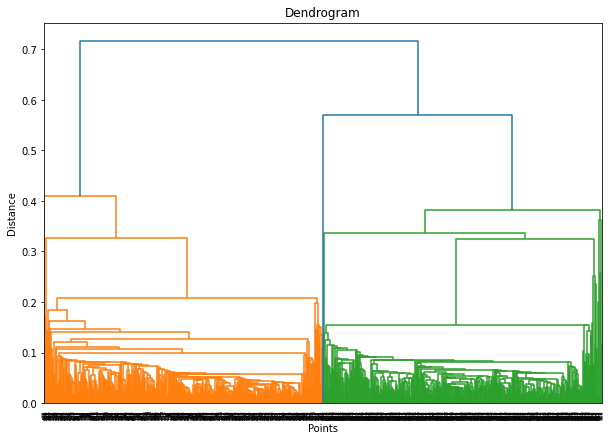

In [61]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_z_se, n_clusters,'maxclust','single')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [62]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_z_se, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 1.43642955292982, 'min_inter_cluster_distance': 2.016409179425483}


## Braycurtis

c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\tom

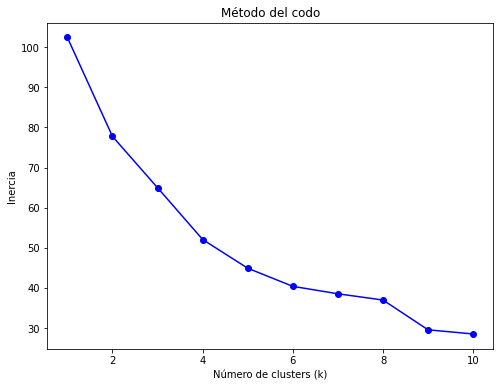

In [53]:
elbow_method_with_distances(d_z_bray, range(1, 11))

In [54]:
n_clusters = 2
labels = apply_kmedoids(d_z_bray, n_clusters)
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

   Cluster  Number of Points
0        0               554
1        1               446


c:\Users\tomys\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [55]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_z_bray, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 0.10172380566588622, 'min_inter_cluster_distance': 0.18489542998843334}


   Cluster  Number of Points
0        1               500
1        2               500


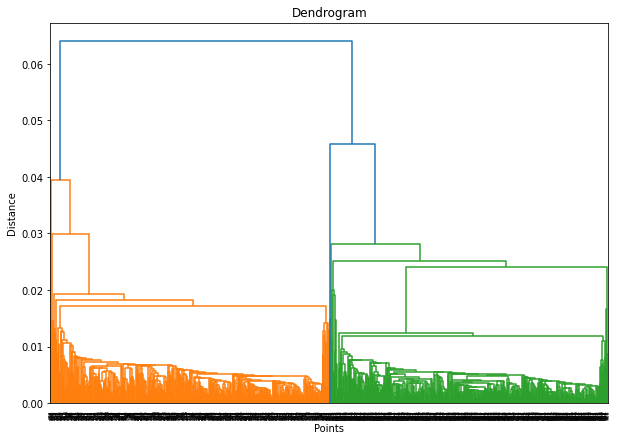

In [56]:
n_clusters = 2
Z, labels = apply_hierarchical_clustering(d_z_bray, n_clusters,'maxclust','single')
cluster_summary = generate_cluster_summary(labels)

print(cluster_summary)

# Dibujar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [57]:
# Evaluación de distancias intra e inter-clúster
metrics = evaluate_clustering(d_z_bray, labels)
print("KMedoids - Métricas:")
print(metrics)

KMedoids - Métricas:
{'avg_intra_cluster_distance': 0.1286408379482901, 'min_inter_cluster_distance': 0.15754237358434708}
